# HW3 - Handwritten Digit Recognition using Support Vector Machines (MNIST Dataset)

Aim: _to build a classifier that can recognize handwritten digits using Support Vector Machines. The project compares linear and RBF kernels and explores hyperparameter tuning via GridSearchCV and RandomizedSearchCV._

##  Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Step 2: Load and Explore the Dataset

In [2]:
mnist = pd.read_csv("train.csv") # Make sure this file is placed in the data/ folder
print("Data preview:")
print(mnist.head())

Data preview:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0     

## Step 3: Prepare features and labels

In [3]:
X = mnist.iloc[:, 1:].values  # Pixel values
y = mnist.iloc[:, 0].values  # Digit labels

## Step 4: Train-test split

In [4]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

## Step 5: Feature scaling

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6: Train Linear SVM

In [ ]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

print("\nSVM with Linear Kernel")
print(classification_report(y_test, y_pred_linear))

# Confusion matrix for linear kernel
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 7: Evaluate RBF SVM


SVM with RBF Kernel
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       827
           1       0.98      0.99      0.98       937
           2       0.91      0.97      0.94       835
           3       0.95      0.94      0.94       870
           4       0.97      0.96      0.96       814
           5       0.95      0.93      0.94       759
           6       0.98      0.97      0.97       827
           7       0.95      0.95      0.95       880
           8       0.96      0.93      0.95       813
           9       0.95      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



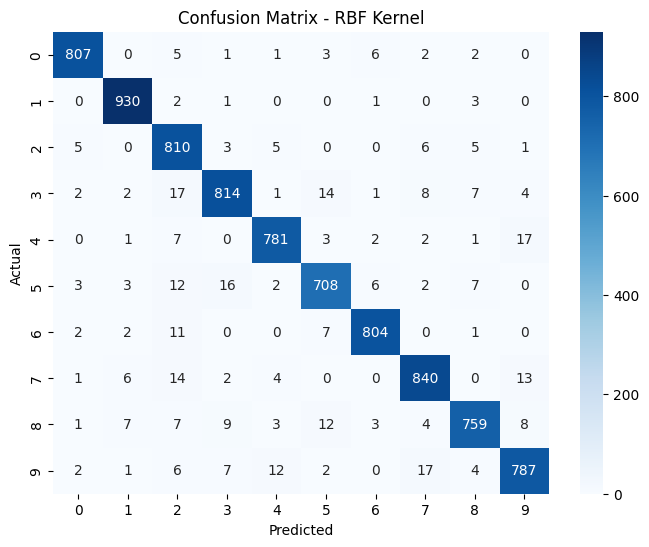

In [7]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("\nSVM with RBF Kernel")
print(classification_report(y_test, y_pred_rbf))

# Confusion matrix for RBF kernel
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 8: Hyperparameter tuning (Grid Search vs Random Search)

In [8]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}

# Use a subset to speed up the search
X_sub = X_train_scaled[:5000]
y_sub = y_train[:5000]

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_sub, y_sub)

random_search = RandomizedSearchCV(
    SVC(kernel='rbf'), param_distributions=param_grid, n_iter=5,
    cv=3, n_jobs=-1, verbose=1, random_state=42
)
random_search.fit(X_sub, y_sub)

print("\nBest Parameters (GridSearch):", grid_search.best_params_)
print("Best Parameters (RandomSearch):", random_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters (GridSearch): {'C': 10, 'gamma': 0.001}
Best Parameters (RandomSearch): {'gamma': 0.001, 'C': 0.1}


## Step 9: Visual comparison of tuning methods

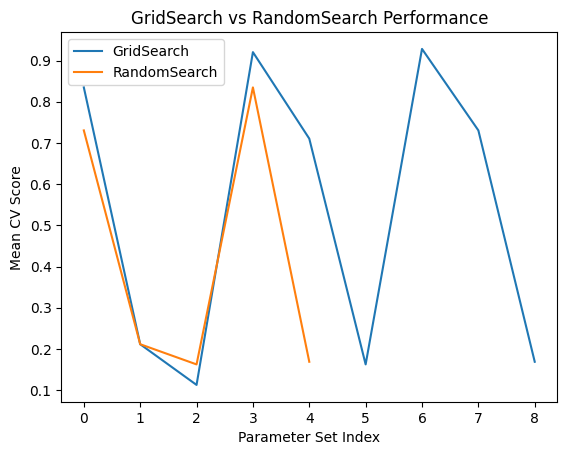

In [9]:
gridscores = grid_search.cv_results_['mean_test_score']
randomscores = random_search.cv_results_['mean_test_score']

plt.plot(gridscores, label="GridSearch")
plt.plot(randomscores, label="RandomSearch")
plt.title("GridSearch vs RandomSearch Performance")
plt.xlabel("Parameter Set Index")
plt.ylabel("Mean CV Score")
plt.legend()
plt.show()

## Conclusion

This project explored the use of Support Vector Machines (SVM) for handwritten digit recognition using the MNIST dataset. Two SVM models were trained and compared: one with a linear kernel and one with a Gaussian (RBF) kernel.

 - Linear Kernel SVM achieved an overall accuracy of 92%, performing well across most digit classes but showing slightly lower performance on digits such as 5 and 8.

 - RBF Kernel SVM outperformed the linear model with an accuracy of 96%, demonstrating superior generalization and better class-wise precision and recall.

 - Hyperparameter tuning was conducted using both Grid Search and Randomized Search. The best performance was achieved with C=10 and gamma=0.001, found via Grid Search.

These results highlight the importance of kernel selection and hyperparameter optimization in SVM models. The RBF kernel proved to be more effective for capturing non-linear patterns in high-dimensional image data like MNIST.